In [10]:
import datasets
from classix import CLASSIX
from sklearn.cluster import KMeans, DBSCAN, HDBSCAN, OPTICS, AgglomerativeClustering, SpectralClustering, MeanShift
from sklearn.metrics import silhouette_score
from datasets import load_dataset
import ucimlrepo
from ucimlrepo import fetch_ucirepo
import numpy as np
import cv2 as cv
import time
import PIL
from PIL import Image
import umap
from matplotlib import pyplot as plt
from sklearn.metrics import adjusted_rand_score as ari

In [17]:
data = fetch_ucirepo(id=267)
data.data.features = data.data.features.dropna()
np.unique(np.array(data.data.targets).T[0])
x = np.array(data.data.features)
y = np.array(data.data.targets).T[0]
labels = y

ConnectionError: Error connecting to server

In [ ]:
x = umap.UMAP(n_components=2, metric='manhattan').fit_transform(x)

/Users/user/Desktop/classix_merge/classix/.venv/lib/python3.13/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


CLASSIX(radius=0.17, minPts=20, group_merging='distance')


Aggregation:   0%|          | 0/1372 [00:00<?, ?it/s]

Manhattan merging completed: 4 clusters
time:  0.014662981033325195


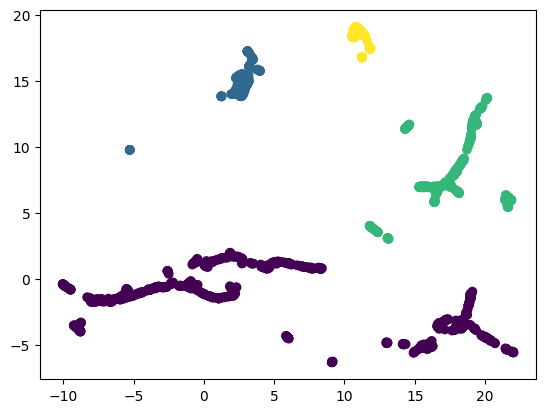

silhouette_score classix_m:  0.39834994077682495
silhouette_score banknote_gt:  0.42882615327835083


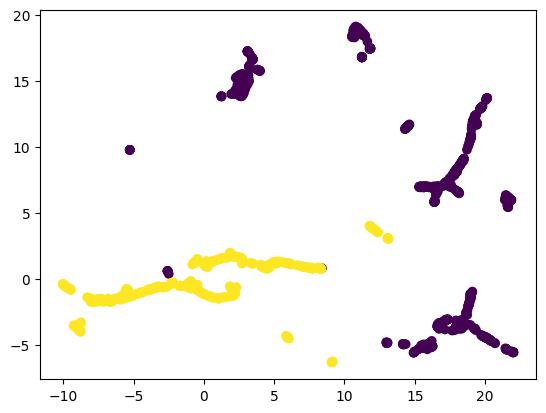

In [ ]:
clx_m = CLASSIX(metric="manhattan", radius=0.17, minPts=20, mergeScale=1.5)
st = time.time()
clx_m.fit(x)
print("time: ", time.time() - st)
plt.scatter(x[:, 0], x[:, 1], c=clx_m.labels_)
plt.show()
# plt.savefig("banknote.svg", format='svg')
plt.scatter(x[:, 0], x[:, 1], c=labels)
# plt.savefig("banknote_gt.svg", format='svg')
print("silhouette_score classix_m: ", silhouette_score(x, clx_m.labels_))
print("silhouette_score banknote_gt: ", silhouette_score(x, labels))

time:  0.027950286865234375
silhouette_score dbscan:  0.5883893966674805


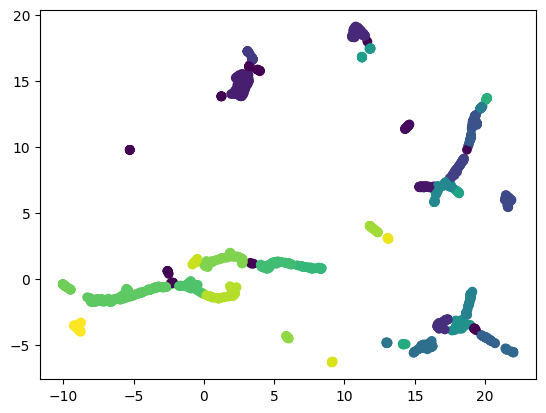

<Figure size 640x480 with 0 Axes>

In [ ]:
db = DBSCAN(eps=0.5, min_samples=10, metric='manhattan')
st = time.time()
db.fit(x)
print("time: ", time.time() - st)
print("silhouette_score dbscan: ", silhouette_score(x, db.labels_))
plt.scatter(x[:, 0], x[:, 1], c=db.labels_)
plt.show()
# plt.savefig("banknote_db.svg", format='svg')

silhouette_score optics:  0.37793663144111633
time:  0.5862288475036621


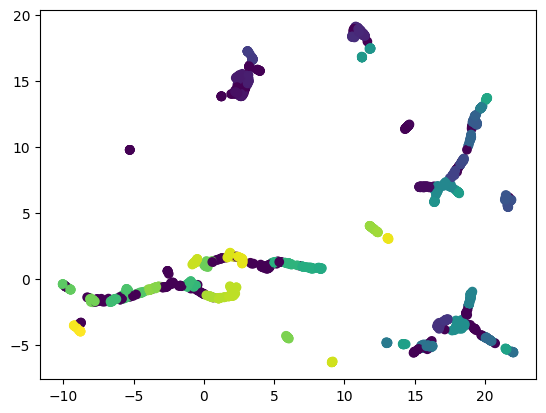

<Figure size 640x480 with 0 Axes>

In [ ]:
op = OPTICS(max_eps = 0.45, min_samples=10, metric='manhattan')
st = time.time()
op.fit(x)
print("silhouette_score optics: ", silhouette_score(x, op.labels_))
print("time: ", time.time() - st)
plt.scatter(x[:, 0], x[:, 1], c=op.labels_)
plt.show()
# plt.savefig("banknote_op.svg", format='svg')

In [ ]:
print("ari classix_m: ", ari(labels, clx_m.labels_))
print("ari dbscan: ", ari(labels, db.labels_))
print("ari optics: ", ari(labels, op.labels_))

ari classix_m:  0.18370792402092254
ari dbscan:  0.07831697191286054
ari optics:  0.01665804857664394


<Figure size 640x480 with 0 Axes>

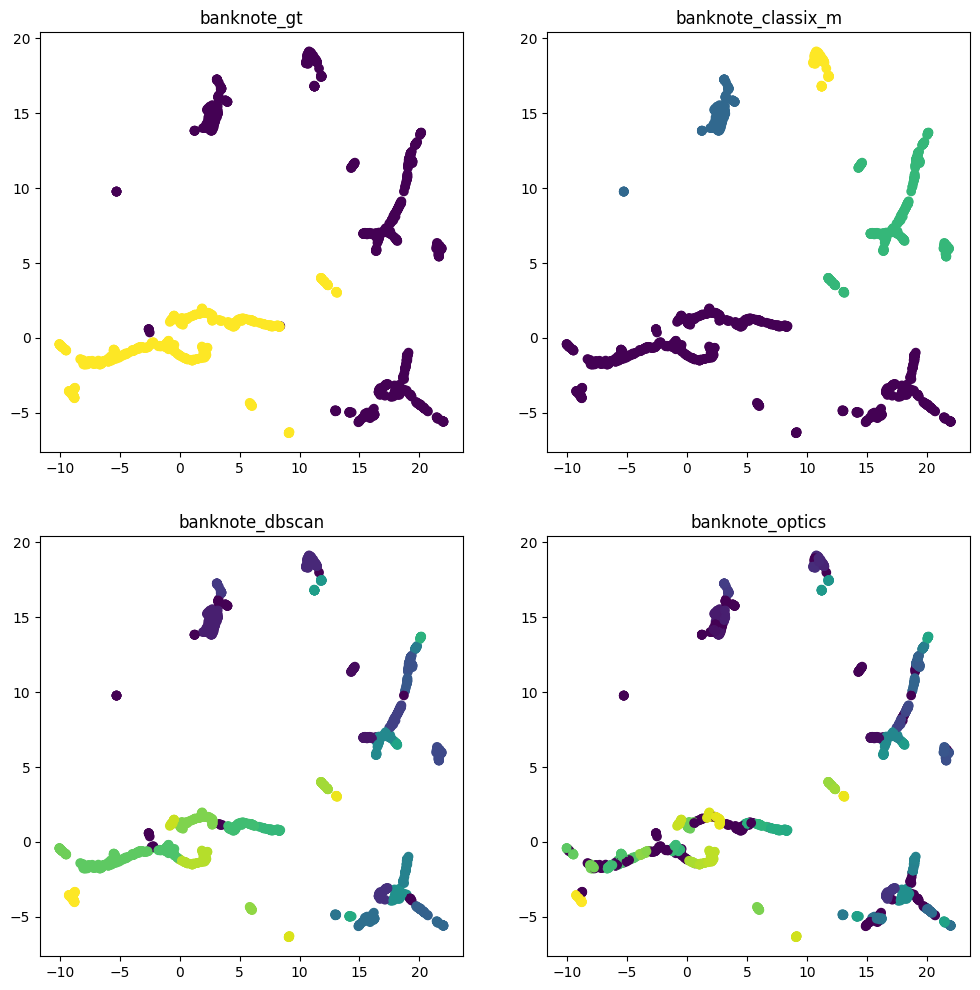

In [ ]:
plt.clf()
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0,0].scatter(x[:, 0], x[:, 1], c=labels)
axes[0,0].set_title("banknote_gt")
axes[0,1].scatter(x[:, 0], x[:, 1], c=clx_m.labels_)
axes[0,1].set_title("banknote_classix_m")
axes[1,0].scatter(x[:, 0], x[:, 1], c=db.labels_)
axes[1,0].set_title("banknote_dbscan")
axes[1,1].scatter(x[:, 0], x[:, 1], c=op.labels_)
axes[1,1].set_title("banknote_optics")
plt.show()
# plt.savefig('banknote_all.svg', format='svg', bbox_inches='tight', dpi=300)